## <font color='blue'>1. Understanding Problem Statement</font>

##### _The data scientists at D-Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store._

##### _Using this model, D-Mart will try to understand the properties of products and stores which play a key role in increasing sales_

## <font color='blue'>2. Data Exploration and Preprocessing</font>

In [19]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Read the data
train_data = pd.read_csv("train_kOBLwZA.csv")

In [22]:
# Check for null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [24]:
# Impute the missing values
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

In [25]:
# check the values Again
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### <font color='blue'>2.1 Encode The Categorical Variables</font>

In [26]:
import category_encoders as ce
# Create an object of the OHE
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],use_cat_names=True)
# Encode the Categorical Variable
train_data = OHE.fit_transform(train_data)

In [31]:
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,FDA15,9.30,1,0,0,0,0,0.016047,1,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,DRC01,5.92,0,1,0,0,0,0.019278,0,1,...,0,0,0,1,0,0,1,0,0,443.4228
2,FDN15,17.50,1,0,0,0,0,0.016760,0,0,...,0,0,1,0,0,1,0,0,0,2097.2700
3,FDX07,19.20,0,1,0,0,0,0.000000,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,NCD19,8.93,1,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,0,0,0,994.7052


### <font color='blue'>2.2 Scale The Data </font>

In [28]:
from sklearn.preprocessing import StandardScaler

# Create an Object of the StandardScaler
scaler = StandardScaler()

# Fit with the ITem_Mrp
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

# Transform the data

train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [30]:
train_data['Item_MRP'].head(5)

0    1.747454
1   -1.489023
2    0.010040
3    0.660050
4   -1.399220
Name: Item_MRP, dtype: float64

## <font color='blue'>3. Model Building</font>

In [32]:
# Important Libararies
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [33]:
# separate the independent and target variable 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']

In [35]:
# randomly split the data
train_x,test_x,train_y,test_y = train_test_split(train_X,train_Y,test_size=0.25,random_state=0)

In [36]:
# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((6392, 45), (2131, 45), (6392,), (2131,))

In [38]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()

In [39]:
# fit the model with the training data
model_LR.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test = model_LR.predict(test_x)

In [41]:
# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y,predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y,predict_test)**(0.5))

RMSE on train data:  1120.4090830904158
RMSE on test data:  1148.7398848515172


#### _Check another Model as Regression gave high RMSE_

In [44]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(train_x, train_y)

# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

c:\users\kollaravikanthyadav\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE on train data:  913.3414339080794
RMSE on test data:  1124.658142373663


## <font color='blue'>4. Feature Importance</font>

#### _The idea is to have a less complex model without compromising on the overall model performance_

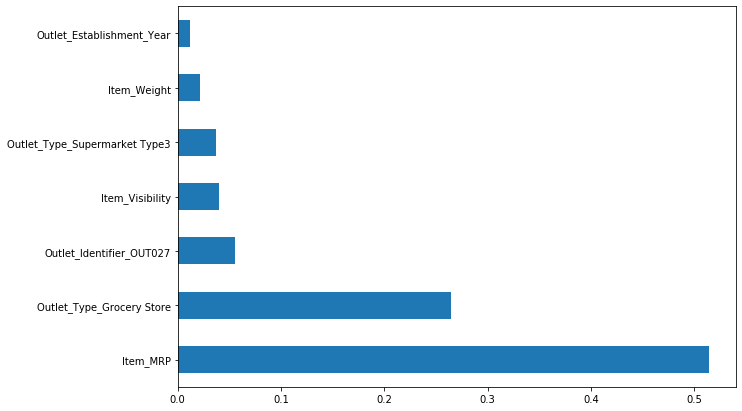

In [45]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importance = pd.Series(model_RFR.feature_importances_,index=train_x.columns)
feat_importance.nlargest(7).plot(kind='barh');

### Training data with 7 most important features

In [46]:
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

In [47]:
# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

In [48]:
# fit the model with the training data
model_RFR_with_if.fit(train_x_if,train_y)

c:\users\kollaravikanthyadav\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [49]:
# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

In [50]:
# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  910.5103433743817
RMSE on test data:  1127.3894117657537


## <font color='blue'>5. Conclusion</font>

#### _This is amazing! Using only 7 features has given almost the same performance as the previous model where we were using 45 features_